### Description of the task and dataset

In [2]:
import pandas as pd
train_data_path = '../cases/data/scoring/scoring_train.csv'
test_data_path = '../cases/data/scoring/scoring_test.csv'
df = pd.read_csv(train_data_path)

In [3]:
df.head(10)

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents,target
0,0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0
5,5,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,0
6,6,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0,0
7,7,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0,0
8,8,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN,0
9,9,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0,0


### Classic approach to the design of the machine learning pipeline

#### Data preprocessing

In [4]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

features_train = df.loc[:, df.columns != 'target']
features_train.fillna(features_train.mean(), inplace=True)
features_train = np.asarray(features_train)[:, 1:]

target_train=np.asarray(df['target'])

d:\projects\compositeautoml\venv\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


#### Model selection and training

In [5]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(features_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model, features_train, target_train, cv=10, scoring='roc_auc')
np.mean(cvs)

0.7882915103348276

#### Model validation

In [7]:
df_test = pd.read_csv(test_data_path)

features_test = df_test.loc[:, df_test.columns != 'target']
features_test.fillna(features_test.mean(), inplace=True)
features_test = np.asarray(features_test)[:, 1:]

target_test=np.asarray(df_test['target'])

d:\projects\compositeautoml\venv\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [8]:
prediction = model.predict(features_test)
prediction_probs = model.predict_proba(features_test)

In [9]:
print(prediction)
print(prediction_probs)

[0 0 0 ... 0 0 0]
[[0.97719506 0.02280494]
 [0.97719506 0.02280494]
 [0.60869565 0.39130435]
 ...
 [0.89308386 0.10691614]
 [0.89308386 0.10691614]
 [0.89308386 0.10691614]]


In [10]:
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, prediction_probs[:, 1])

0.7729714030384273

#### Manual optimisation of the pipeline (model selection, hyperparameter tuning)

In [11]:
model_new = DecisionTreeClassifier(max_depth=4)
model_new.fit(features_train, target_train)

prediction_probs_new = model_new.predict_proba(features_test)

roc_auc_score(target_test, prediction_probs_new[:, 1])

0.8016453182404926

In [12]:
model_new = DecisionTreeClassifier(max_depth=7)
model_new.fit(features_train, target_train)

prediction_probs_new = model_new.predict_proba(features_test)

roc_auc_score(target_test, prediction_probs_new[:, 1])

0.7895362923244961

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

model_new = GradientBoostingClassifier(n_estimators=30)
model_new.fit(features_train, target_train)

prediction_probs_new = model_new.predict_proba(features_test)

roc_auc_score(target_test, prediction_probs_new[:, 1])

0.8439727931685036

### AutoML for pipeline design (FEDOT framework example)

In [1]:
from fedot.api.api_runner import Fedot

model = Fedot(ml_task='classification')
fedot_model = model.fit(features=train_data_path, target='target')

NameError: name 'train_data_path' is not defined

In [15]:
prediction = model.predict(features=test_data_path)
roc_auc = model.quality_metric()
print(-roc_auc)

0.855


### AutoML for the time series forecasting

In [1]:
from fedot.api.api_runner import Fedot
from fedot.core.repository.tasks import TsForecastingParams

composer_params = {'max_depth': 1,
                   'max_arity': 2,
                   'learning_time': 0.1,
                   'with_tuning': False}

train_data_path = './jupyter_media/intro/salaries.csv'
model = Fedot(ml_task='ts_forecasting', composer_params=composer_params,
                  task_params=TsForecastingParams(forecast_length=10,
                                                  max_window_size=10,
                                                  make_future_prediction=True))

chain = model.fit(features=train_data_path, target='target')
ts_forecast = model.forecast(pre_history=train_data_path, forecast_length = 30)

D:\Projects\CompositeAutoML\fedot\core\data\data.py:193: UserWarning: Automatic factorization for the column date with type "object" is applied.
  warnings.warn(f'Automatic factorization for the column {column_name} with type "object" is applied.')


Best metric is 634523.9939249556
Generation num: 0
max_depth: 1, no improvements: 0
spent time: 0.1 min
Best metric is 2.3281146156624746e-09
Generation num: 1
max_depth: 1, no improvements: 0
spent time: 0.2 min
Best metric is 2.3281146156624746e-09
Generation num: 2
max_depth: 1, no improvements: 1
spent time: 0.4 min
Best metric is 1.205757302989023e-09
Generation num: 3
max_depth: 1, no improvements: 0
spent time: 0.6 min
Best metric is 8.18135796226831e-10
Generation num: 4
max_depth: 1, no improvements: 0
spent time: 0.7 min
Best metric is 8.18135796226831e-10
Generation num: 5
max_depth: 1, no improvements: 1
spent time: 0.9 min
Best metric is 8.18135796226831e-10
Composition time: 0.933 min
Algorithm was terminated due to processing time limit
GP composition finished
Fit chain from scratch


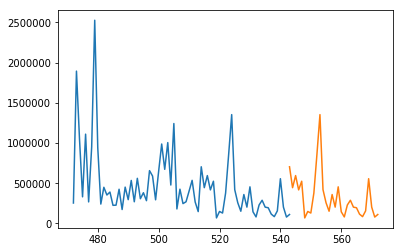

In [6]:
import matplotlib.pyplot as plt
last_ind = int(round(model.train_data.idx[-1]))
plt.plot(model.train_data.idx[-72:], model.train_data.target[-72:])
plt.plot(range(last_ind,last_ind+len(ts_forecast)), ts_forecast)